# Preparation Functions

### Imports

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import MinMaxScaler

from imblearn.under_sampling import RandomUnderSampler
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Data Cleaning

In [23]:
def get_data():
    # Get Data
    df = pd.read_csv('DataSetForPhishingVSBenignUrl.csv')

    X = df.iloc[:, :78]
    y = df.iloc[:, 79]

    #Encodd the following fields
    le = LabelEncoder()
    
    for col in X.columns:
        X[col] = le.fit_transform(X[col])
    return X,y

### Graph Functions

In [24]:

def accuracy_graph(accuracy_labels,accuracy_values, title=None):
    fig,ax = plt.subplots()

    bar_container = ax.bar(accuracy_labels, accuracy_values)
    ax.bar_label(bar_container, fmt='{:,.7f}')
    #ax.bar_label(bar_container)
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    ax.set_xlabel('Depth')
    plt.show()

### Decision Tree Model

In [30]:
def example1():
    #No Undesampling
    # Get data from CSV
    X, y = get_data()
    #print(np.unique(y))
    
    gini_accuracy = []
    gini_labels = []
    
    entropy_accuracy = []
    entropy_labels = []

    graph = False
        
    # Splitting data into 80% training and 20% test data:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    for i in range(1,7):
        if i == 2:
            graph = True
        else: graph = False
            
        gini_accuracy.append(Decision_Tree(X_train, X_test, y_train, y_test, max_d=i, c = 'gini', tree_graph=graph ))
        gini_labels.append(f'{i}')
            
        entropy_accuracy.append(Decision_Tree(X_train, X_test, y_train, y_test, max_d=i, c = 'entropy' ))
        entropy_labels.append(f'{i}')
    
    accuracy_graph(gini_labels, gini_accuracy, title='Gini')
    accuracy_graph(entropy_labels, entropy_accuracy, title='Entropy')

In [31]:
def Decision_Tree(X_train, X_test, y_train, y_test, max_d=1, c = 'gini', tree_graph=False):
   
    labels = []
    accuracy = []
    X_train = X_train.values
    tree_model = DecisionTreeClassifier(criterion=c, max_depth=max_d, random_state=1)
    tree_model.fit(X_train, y_train.values)
    
    if tree_graph == True:
        from sklearn import tree
    
        tree.plot_tree(tree_model)
        #plt.savefig('images/03_21_1.pdf')
        plt.show()
        
    return tree_model.score(X_train, y_train)





# Main Code

In [32]:
def example2():
    #Undersampling
    # Get data from CSV
    X, y = get_data()
    #print(np.unique(y))
    
    gini_accuracy = []
    gini_labels = []
    
    entropy_accuracy = []
    entropy_labels = []
    
    sampling_string = 'majority'
    rus = RandomUnderSampler(sampling_strategy=sampling_string, random_state=42)
    X_resample, y_resample = rus.fit_resample(X, y)
        
    # Splitting data into 80% training and 20% test data:
    X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=42, stratify=y_resample)
    
    for i in range(1,7):
        gini_accuracy.append(Decision_Tree(X_train, X_test, y_train, y_test, max_d=i, c = 'gini' ))
        gini_labels.append(f'{i}')
            
        entropy_accuracy.append(Decision_Tree(X_train, X_test, y_train, y_test, max_d=i, c = 'entropy' ))
        entropy_labels.append(f'{i}')
    
    accuracy_graph(gini_labels, gini_accuracy, title='Gini')
    accuracy_graph(entropy_labels, entropy_accuracy, title='Entropy')



# Results

## Decision Tree Without Undersampling
The following are my observations for the Gini and Entropy models at depths from 1 to 6:

- Gini: As the depth increased (from 1 moving towards 6), the performance of the model also increased.
- Entropy: As the depth increased (from 1 moving towards 6), the performance of the model also increased.
- The Entropy model performed better than the Gini model for depths 1 and 2
- The Gini model performed bettern than the Entropy model for depths 3 - 6


# Virtualizing the Tree

*example1()* had the best results for depth of 2.

**Parameters:**
- No undersampling
- Entropy
- Depth 2



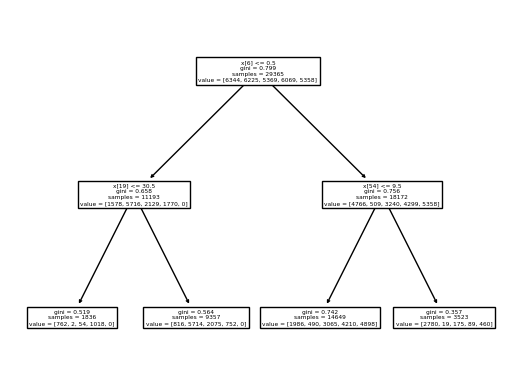

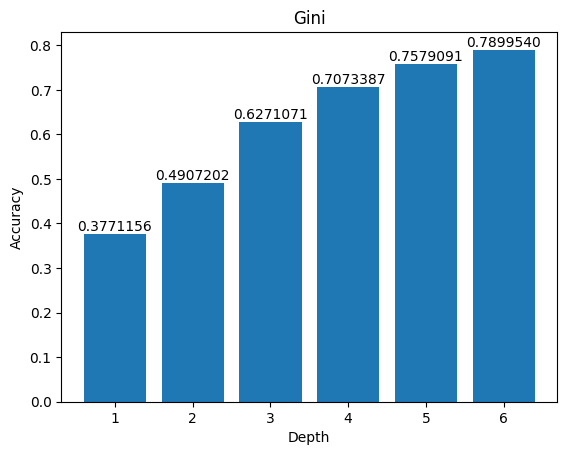

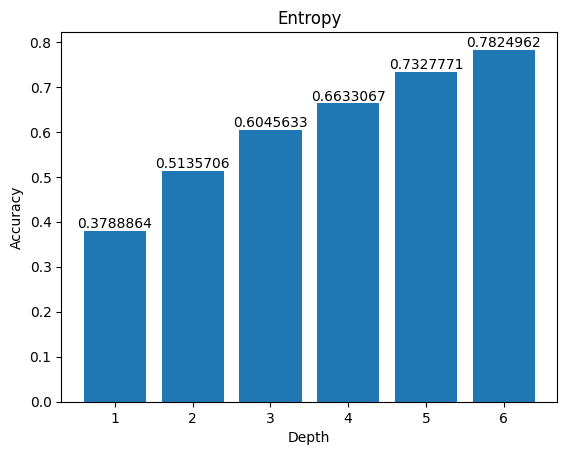

In [33]:
example1()

## Decision Tree With Undersampling
The following are my observations for the Gini and Entropy models at depths from 1 to 6:

- Gini: As the depth increased (from 1 moving towards 6), the performance of the model also increased.
- Entropy: As the depth increased (from 1 moving towards 6), the performance of the model also increased.
- The Entropy model performed the same as the Gini model for depths 1 and 2
- The Gini model performed bettern than the Entropy model for depths 3 - 6

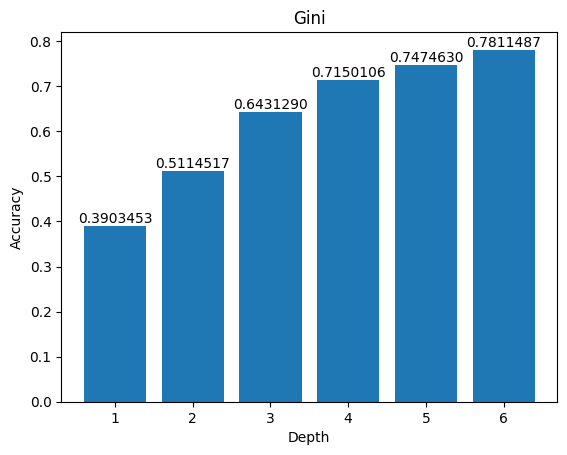

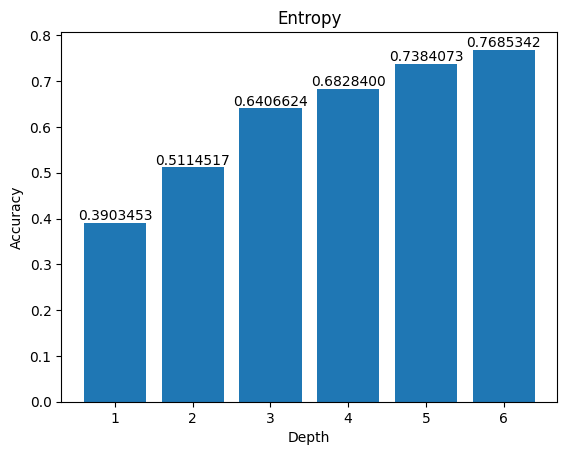

In [34]:
example2()

# Undersampling Vs not Undersampling

**Gini**

- Undersmapling out performed not undersampling at depths 1 throuhg 4
- Not undersampling outperformed undersampling at depths 5 and 6

**Entropy**
- Undersmapling out performed not undersampling at depths 1 and 3 throuhg 4
- Not undersampling outperformed undersampling at depths 2 and 6